In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('MD_agric_exam-4313.csv')

In [3]:
df

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava
...,...,...,...,...,...,...,...,...,...,...
995,2202,572.95935,625.6,-5.5,31.0,5.258964,0.086330,1.2,0.750675,wheat
996,2531,552.80945,398.1,-5.9,33.4,4.607136,0.130178,0.8,0.449790,wheat
997,1040,678.22504,564.4,-4.6,31.7,5.567556,0.448149,1.2,0.492988,maize
998,58,792.65370,928.5,-3.3,31.2,5.102048,0.387350,1.1,0.597557,potato


#### 1. Write code to determine the number of unique crop types in the dataset?

In [4]:
unique_crop_count = len(df['Crop_type'].unique())

print("number of unique crop types:", unique_crop_count)

number of unique crop types: 8


#### 2. Identify the maximum annual yield for "wheat" crop type in the dataset (rounded to 2 decimal places).

In [5]:
max_anual_wheat_yield = df[df['Crop_type'] == "wheat"]['Annual_yield'].max()
print("Maximum anual yield for wheat:", max_anual_wheat_yield)

Maximum anual yield for wheat: 8.994376295629458


#### 3. Find the total rainfall for crop types where the average pollution level is above 0.2.

In [6]:
grouped_df = df.groupby('Crop_type').agg(
    average_pollution=('Pollution_level', 'mean'),
    total_rainfall=('Rainfall', 'sum')
)
filtered = grouped_df[grouped_df['average_pollution'] > 0.2]
result = filtered['total_rainfall'].sum()
print("Total Rainfall:", result)

Total Rainfall: 941959.7000000001


#### 4. Write a function to calculate the temperature range (Max_temperature_C - Min_temperature_C) for each farmer's field. Then, call the function with the following `Field_ID`: `1458`, `1895`, and `5443`. What are the results of these 3 calls?

In [7]:
def calculate_temperature_range(df, field_id):
    field = df[df['Field_ID'] == field_id]
    if not field.empty:
        temp_range = field['Max_temperature_C'].values[0] - field['Min_temperature_C'].values[0]
        return temp_range
    else:
        return f"Field_ID {field_id} not found."

# Test the function with Field_IDs: 1458, 1895, and 5443
results = {
    field_id: calculate_temperature_range(df, field_id) 
    for field_id in [1458, 1895, 5443]
}

# Print the results
for field_id, temp_range in results.items():
    print(f"Temperature range for Field_ID {field_id}: {temp_range}")

Temperature range for Field_ID 1458: 40.7
Temperature range for Field_ID 1895: 35.7
Temperature range for Field_ID 5443: 33.4


### 5. What does the following code achieve?

a = data['Crop_type'].unique()

b = float('inf')

c = ''

for crop in a:

    d = data[data['Crop_type'] == crop]['Min_temperature_C'].mean()

    if d < b:

        b = d

        c = crop

print(c)

In [8]:
a = df['Crop_type'].unique()

b = float('inf')

c = ''

for crop in a:

    d = df[df['Crop_type'] == crop]['Min_temperature_C'].mean()
    
    if d < b:
    
        b = d
    
        c = crop
print(c)

rice


#### 6. Write code to calculate the total plot size for plots where the pH is less than 5.5.

In [9]:
less_than_55 = df[df['pH'] < 5.5]
less_than_55['Plot_size'].sum()

1731.8999999999999

#### 7. Using Pandas, create a dataframe that includes entries with a 'Min_temperature_C’< -5 and a 'Max_temperature_C' > 30. How many rows are in the filtered dataset?

In [10]:
temp_df = df[(df['Min_temperature_C'] < -5) & (df['Max_temperature_C'] > 30)]
temp_df.shape

(319, 10)

#### 8. Using Numpy, calculate the standard deviation of the 'Rainfall' for plots where the 'Plot_size' is larger than the median plot size of the dataset (round to 2 decimal places).

In [11]:
# Find the median Plot_size.
median_plot_size = df['Plot_size'].median()

#Filter the dataset to include only rows where Plot_size is larger than this median.
larger_than_median_data = df[df['Plot_size'] > median_plot_size]

#Calculate the standard deviation of Rainfall for the filtered dataset.
rainfall_std = np.std(larger_than_median_data['Rainfall'], ddof=0)

#Round the result to 2 decimal places.
rainfall_std_rounded = round(rainfall_std, 2)
print("Standard deviation of Rainfall for plots larger than the median plot size:", rainfall_std_rounded)

Standard deviation of Rainfall for plots larger than the median plot size: 469.62


#### 9. If you concatenate the first three digits of the most common ‘Max_temperature_C’ with the last three letters of the least common 'Crop_type', what string do you get?
Note: Use the first mode if there are multiple modes

In [12]:
most_common_temp = df['Max_temperature_C'].mode()[0] 

first_three_digits = str(most_common_temp)[:3]

crop_type_counts = df['Crop_type'].value_counts()

least_common_crop = crop_type_counts.index[-1]  # The last index is the least common

# Extract the last three letters
last_three_letters = least_common_crop[-3:]

# Step 3: Concatenate the two parts
result = first_three_digits + last_three_letters

print("Resulting string:", result)

Resulting string: 30.ice


10. Write Python code to create a violin plot visualising the distribution of 'Annual_yield' across different 'Elevation' ranges. Use the provided elevation range categories (Low: < 300m, Medium: 300m - 600m, High: > 600m) to categorise the data before plotting.  Examine the violin plot displaying the distribution of 'Annual Yield' across three elevation categories (Low, Medium, High). What insight does the violin plot provide regarding the relationship between elevation ranges and annual yield distribution?

'Low' elevation has the highest yield variability, suggesting that these areas might experience a wider range of factors influencing agricultural productivity.
The 'Low' elevation category shows a more consistent yield distribution with less variability compared to the 'Medium' and 'High' categories. This could indicate that lower elevations provide stable conditions for consistent agricultural output.
The violin is not visible for the high elevation category. This means that there are very few or no data points in this category.
'Medium' elevation exhibits a variability in yield, but to a significantly lesser extent than the 'High' elevation, potentially due to a mix of conditions that affect crop yield.

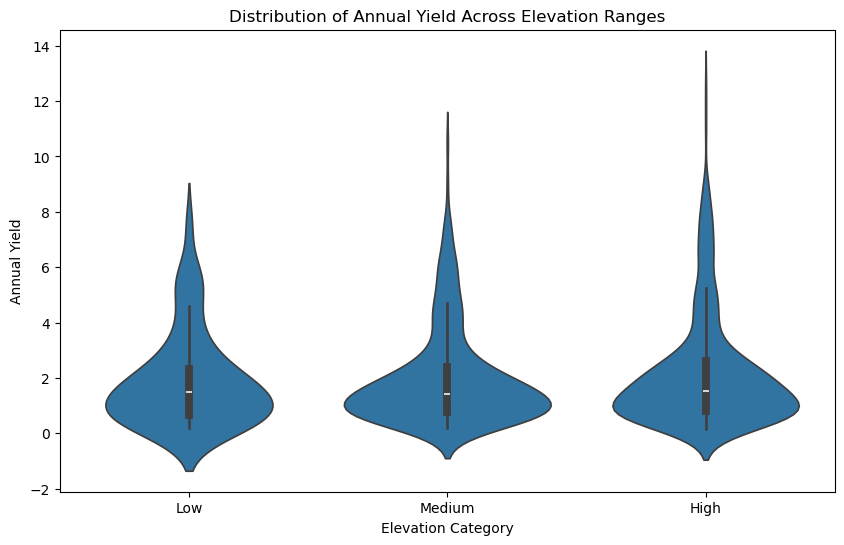

In [13]:
# Step 1: Categorize 'Elevation' into ranges
df['Elevation_category'] = pd.cut(
    df['Elevation'],
    bins=[-float('inf'), 300, 600, float('inf')],
    labels=['Low', 'Medium', 'High']
)

# Step 2: Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Elevation_category', y='Annual_yield', data=df)
plt.title('Distribution of Annual Yield Across Elevation Ranges')
plt.xlabel('Elevation Category')
plt.ylabel('Annual Yield')
plt.show()

#### 11. Assuming each 'Crop_type' contributes an integer value equal to its length (e.g., 'wheat' contributes 5), write a recursive function to sum the integer values for each unique crop type in the dataset. What is the sum?

In [14]:
# Get the unique crop types
unique_crops = df['Crop_type'].unique()

# Recursive function to calculate the sum of lengths of crop types
def sum_crop_lengths(crops):
    if len(crops) == 0:  # Base case: if the list is empty, return 0
        return 0
    else:
        return len(crops[0]) + sum_crop_lengths(crops[1:])  # Add the length of the first crop and recurse

# Calculate the sum for unique crops
total_sum = sum_crop_lengths(unique_crops)

print("The sum of integer values for each unique crop type:", total_sum)

The sum of integer values for each unique crop type: 42


#### 12. Write Python code to perform a t-test comparing the average 'Annual_yield' between 'coffee' and 'banana' crop types using scipy.stats. What is the p-value, rounded to three decimal places?

In [16]:
from scipy import stats

# Split the data into two groups based on crop type
coffee_yield = df[df['Crop_type'] == 'coffee']['Annual_yield']
banana_yield = df[df['Crop_type'] == 'banana']['Annual_yield']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(coffee_yield, banana_yield)

# Print the p-value rounded to three decimal places
print(f"P-value: {p_value:.3f}")

P-value: 0.598
